# ASSIGNMENT **4**


========== K-Means Clustering on Iris Dataset ==========

K-Means Cluster Centers:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Cluster Labels:
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


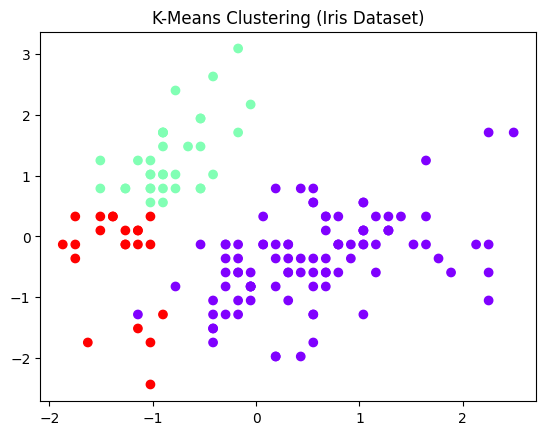


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.7214317673378076
Adjusted Rand Score: 0.432804702527474
Mutual Info Score: 0.5873860302030209
Adjusted Mutual Info Score: 0.5838319867268821
Normalized Mutual Info Score: 0.5895674488004073
---------------------------------------------
Silhouette Coefficient: 0.4798814508199817
Calinski-Harabasz Index: 157.36015312192248
Davies-Bouldin Index: 0.7893630242997912
---------------------------------------------
Cohesion (SSE): 1925.1670233053892
Separation (SSB): 206.04970970245685
---------------------------------------------


========== K-Means Clustering on Wine Dataset ==========

K-Means Cluster Centers:
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478

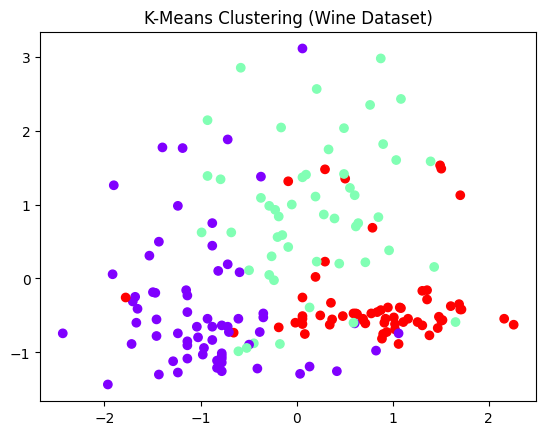


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.9542944201104552
Adjusted Rand Score: 0.8974949815093207
Mutual Info Score: 0.9544575015299441
Adjusted Mutual Info Score: 0.874579440437926
Normalized Mutual Info Score: 0.8758935341223069
---------------------------------------------
Silhouette Coefficient: 0.2848589191898987
Calinski-Harabasz Index: 70.9400080031512
Davies-Bouldin Index: 1.3891879777181646
---------------------------------------------
Cohesion (SSE): 4135.702810870707
Separation (SSB): 755.4869295601509
---------------------------------------------



In [ ]:
# =========================
# K-Means Clustering on Iris & Wine Dataset
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import (
    rand_score, adjusted_rand_score,
    mutual_info_score, adjusted_mutual_info_score,
    normalized_mutual_info_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# Function for performance evaluation
# ----------------------------------------
def evaluate_clustering(X, labels_true, labels_pred):
    print("\nClustering Performance Scores:")
    print("---------------------------------------------")
    print("Rand Score:", rand_score(labels_true, labels_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(labels_true, labels_pred))
    print("Mutual Info Score:", mutual_info_score(labels_true, labels_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(labels_true, labels_pred))
    print("Normalized Mutual Info Score:", normalized_mutual_info_score(labels_true, labels_pred))
    print("---------------------------------------------")
    print("Silhouette Coefficient:", silhouette_score(X, labels_pred))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels_pred))
    print("Davies-Bouldin Index:", davies_bouldin_score(X, labels_pred))

    # SSE (Cohesion)
    sse = np.sum((X - KMeans(n_clusters=len(np.unique(labels_pred))).fit(X).cluster_centers_[labels_pred]) ** 2)

    # SSB (Separation)
    overall_mean = np.mean(X, axis=0)
    clusters = np.unique(labels_pred)
    ssb = np.sum([len(X[labels_pred == c]) * np.sum((KMeans(n_clusters=len(clusters)).fit(X).cluster_centers_[c] - overall_mean) ** 2)
                  for c in clusters])

    print("---------------------------------------------")
    print("Cohesion (SSE):", sse)
    print("Separation (SSB):", ssb)
    print("---------------------------------------------\n")


# ----------------------------------------
# Function to run K-Means
# ----------------------------------------
def run_kmeans(data_name, X, y):
    print(f"\n========== K-Means Clustering on {data_name} Dataset ==========")

    # Scale the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply K-Means
    kmeans = KMeans(n_clusters=len(np.unique(y)), init='k-means++', random_state=42)
    kmeans.fit(X_scaled)

    print("\nK-Means Cluster Centers:")
    print(kmeans.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans.labels_)

    # Visualization (like demo screenshot)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
    plt.title(f'K-Means Clustering ({data_name} Dataset)')
    plt.show()

    # Evaluate
    evaluate_clustering(X_scaled, y, kmeans.labels_)


# ----------------------------------------
# Load and Run for both datasets
# ----------------------------------------

# Iris
iris = load_iris()
run_kmeans("Iris", iris.data, iris.target)

# Wine
wine = load_wine()
run_kmeans("Wine", wine.data, wine.target)



========== Hierarchical Clustering on Iris Dataset ==========


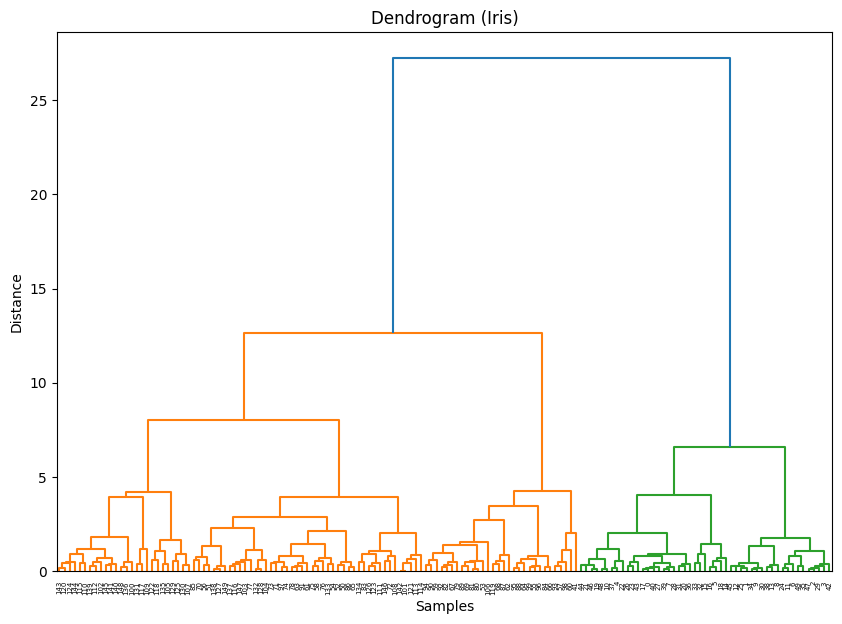


Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


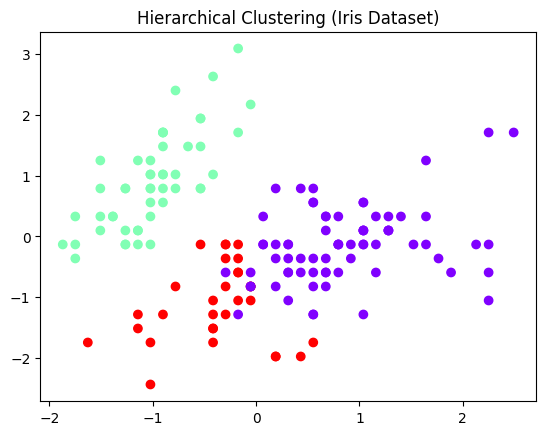


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.8252348993288591
Adjusted Rand Score: 0.6153229932145449
Mutual Info Score: 0.7227570387573627
Adjusted Mutual Info Score: 0.6712861348071291
Normalized Mutual Info Score: 0.6754701853436886
---------------------------------------------
Silhouette Coefficient: 0.4466890410285909
Calinski-Harabasz Index: 222.71916382215363
Davies-Bouldin Index: 0.8034665302876753
---------------------------------------------


========== Hierarchical Clustering on Wine Dataset ==========


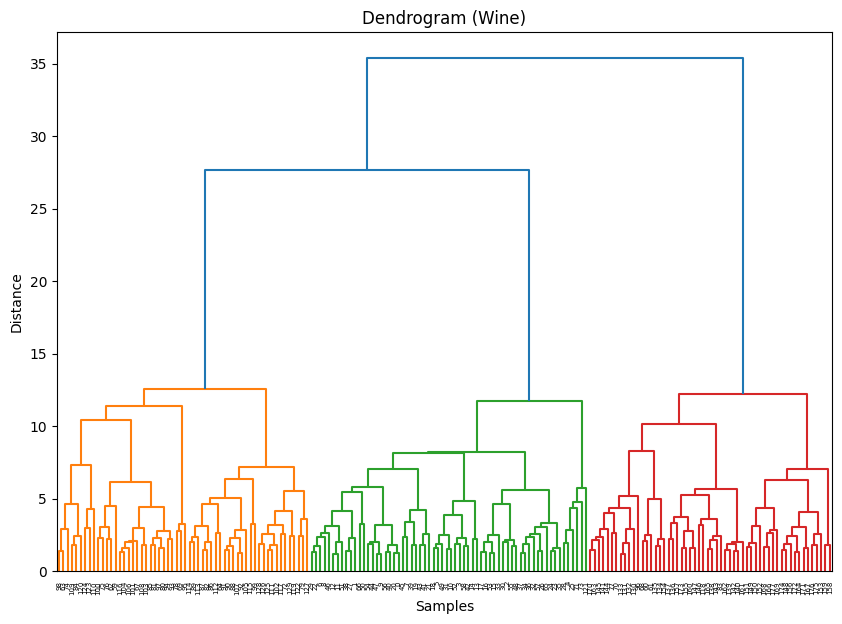


Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


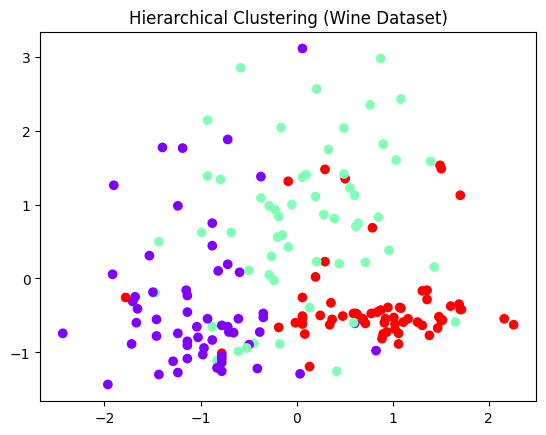


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.9064940011426394
Adjusted Rand Score: 0.7899332213582837
Mutual Info Score: 0.8584365761880874
Adjusted Mutual Info Score: 0.7842084168747389
Normalized Mutual Info Score: 0.7864652657004837
---------------------------------------------
Silhouette Coefficient: 0.2774439826952266
Calinski-Harabasz Index: 67.6474675044098
Davies-Bouldin Index: 1.4185919431857326
---------------------------------------------



In [1]:
# ==========================================
# Hierarchical Clustering (Dendrogram)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    rand_score, adjusted_rand_score,
    mutual_info_score, adjusted_mutual_info_score,
    normalized_mutual_info_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from scipy.cluster.hierarchy import dendrogram, linkage

# ----------------------------------------
# Function for Clustering Evaluation
# ----------------------------------------
def evaluate_clustering(X, labels_true, labels_pred):
    print("\nClustering Performance Scores:")
    print("---------------------------------------------")
    print("Rand Score:", rand_score(labels_true, labels_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(labels_true, labels_pred))
    print("Mutual Info Score:", mutual_info_score(labels_true, labels_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(labels_true, labels_pred))
    print("Normalized Mutual Info Score:", normalized_mutual_info_score(labels_true, labels_pred))
    print("---------------------------------------------")
    print("Silhouette Coefficient:", silhouette_score(X, labels_pred))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels_pred))
    print("Davies-Bouldin Index:", davies_bouldin_score(X, labels_pred))
    print("---------------------------------------------\n")


# ----------------------------------------
# Function to Plot Dendrogram
# ----------------------------------------
def plot_dendrogram(X, method='ward', dataset_name='Dataset'):
    linked = linkage(X, method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f"Dendrogram ({dataset_name})")
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


# ----------------------------------------
# Function to run Hierarchical Clustering
# ----------------------------------------
def run_hierarchical(data_name, X, y):
    print(f"\n========== Hierarchical Clustering on {data_name} Dataset ==========")

    # Scale the data
    X_scaled = StandardScaler().fit_transform(X)

    # Plot Dendrogram
    plot_dendrogram(X_scaled, method='ward', dataset_name=data_name)

    # Perform Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=len(np.unique(y)), linkage='ward')
    labels_pred = model.fit_predict(X_scaled)

    print("\nCluster Labels:")
    print(labels_pred)

    # Visualization
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_pred, cmap='rainbow')
    plt.title(f'Hierarchical Clustering ({data_name} Dataset)')
    plt.show()

    # Evaluate Clustering
    evaluate_clustering(X_scaled, y, labels_pred)


# ----------------------------------------
# Run for Iris and Wine Datasets
# ----------------------------------------
iris = load_iris()
run_hierarchical("Iris", iris.data, iris.target)

wine = load_wine()
run_hierarchical("Wine", wine.data, wine.target)



========== DBSCAN Clustering on Iris Dataset ==========

DBSCAN Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  2  2  2  2  2  2  2 -1  2  2 -1  2 -1  2  2  2  2  2 -1  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2 -1  2  2
  2  2 -1  2  2  2  2  2  2 -1 -1  2 -1 -1  2  2  2  2  2  2  2 -1 -1 -1
  2  2 -1  2  2 -1  2  2  2  2  2 -1  2  2  2 -1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2]
Number of clusters (excluding noise): 3
Number of noise points: 19


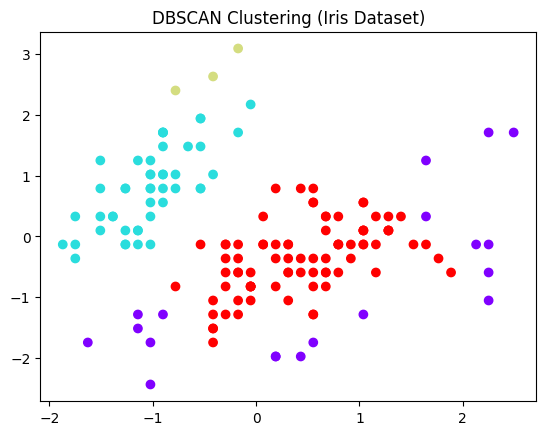


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.7593736017897091
Adjusted Rand Score: 0.48541172995292864
Mutual Info Score: 0.6140350175895597
Adjusted Mutual Info Score: 0.5671522429245761
Normalized Mutual Info Score: 0.576236807549922
---------------------------------------------
Silhouette Coefficient: 0.3556817950624793
Calinski-Harabasz Index: 88.50349832377886
Davies-Bouldin Index: 3.1580755085602297
---------------------------------------------
Cohesion (SSE): N/A for DBSCAN
Separation (SSB): N/A for DBSCAN
---------------------------------------------


========== DBSCAN Clustering on Wine Dataset ==========

DBSCAN Cluster Labels:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -

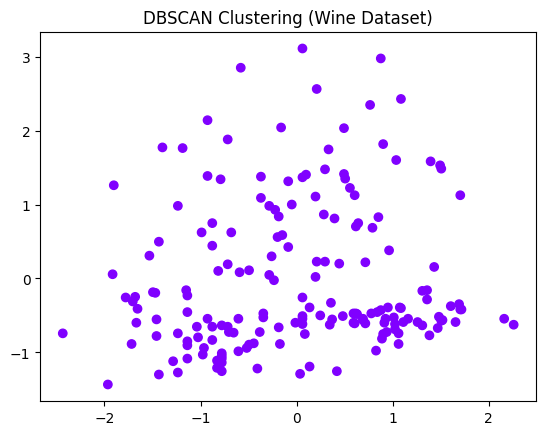


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.3379673712943566
Adjusted Rand Score: 0.0
Mutual Info Score: 0.0
Adjusted Mutual Info Score: 0.0
Normalized Mutual Info Score: 0.0
---------------------------------------------
Silhouette / CH / DBI not applicable (too few clusters)
---------------------------------------------
Cohesion (SSE): N/A for DBSCAN
Separation (SSB): N/A for DBSCAN
---------------------------------------------



In [2]:
# =========================
# DBSCAN Clustering on Iris & Wine Dataset
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    rand_score, adjusted_rand_score,
    mutual_info_score, adjusted_mutual_info_score,
    normalized_mutual_info_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# Function for performance evaluation
# ----------------------------------------
def evaluate_clustering(X, labels_true, labels_pred):
    print("\nClustering Performance Scores:")
    print("---------------------------------------------")
    print("Rand Score:", rand_score(labels_true, labels_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(labels_true, labels_pred))
    print("Mutual Info Score:", mutual_info_score(labels_true, labels_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(labels_true, labels_pred))
    print("Normalized Mutual Info Score:", normalized_mutual_info_score(labels_true, labels_pred))
    print("---------------------------------------------")

    # Handle case where all points are noise (-1) or single cluster
    unique_labels = np.unique(labels_pred)
    if len(unique_labels) > 1 and len(unique_labels) < len(X):
        print("Silhouette Coefficient:", silhouette_score(X, labels_pred))
        print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels_pred))
        print("Davies-Bouldin Index:", davies_bouldin_score(X, labels_pred))
    else:
        print("Silhouette / CH / DBI not applicable (too few clusters)")

    # SSE & SSB are not directly meaningful for DBSCAN
    print("---------------------------------------------")
    print("Cohesion (SSE): N/A for DBSCAN")
    print("Separation (SSB): N/A for DBSCAN")
    print("---------------------------------------------\n")


# ----------------------------------------
# Function to run DBSCAN
# ----------------------------------------
def run_dbscan(data_name, X, y, eps_val=0.5, min_samples_val=5):
    print(f"\n========== DBSCAN Clustering on {data_name} Dataset ==========")

    # Scale the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
    labels_pred = dbscan.fit_predict(X_scaled)

    print("\nDBSCAN Cluster Labels:")
    print(labels_pred)
    print(f"Number of clusters (excluding noise): {len(set(labels_pred)) - (1 if -1 in labels_pred else 0)}")
    print(f"Number of noise points: {list(labels_pred).count(-1)}")

    # Visualization (like your demo screenshot)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_pred, cmap='rainbow')
    plt.title(f'DBSCAN Clustering ({data_name} Dataset)')
    plt.show()

    # Evaluate
    evaluate_clustering(X_scaled, y, labels_pred)


# ----------------------------------------
# Load and Run for both datasets
# ----------------------------------------

# Iris
iris = load_iris()
run_dbscan("Iris", iris.data, iris.target, eps_val=0.6, min_samples_val=4)

# Wine
wine = load_wine()
run_dbscan("Wine", wine.data, wine.target, eps_val=1.2, min_samples_val=6)



========== OPTICS Clustering on Iris Dataset ==========

OPTICS Cluster Labels:
[ 0  1  1  1  0 -1 -1  0 -1  1 -1  0  1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0
 -1  1  0  0  0  1  1 -1 -1 -1  1 -1 -1  0  1  0  0 -1  1 -1 -1  1 -1  1
 -1  0 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  3  2 -1  2 -1 -1 -1 -1  3
 -1  3  3 -1 -1 -1  3 -1 -1 -1  2 -1 -1 -1 -1 -1  2 -1  2  3 -1 -1  2  2
  2  3 -1  2 -1 -1  4  4  4 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  4 -1 -1 -1
  4 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1  4  4  4 -1  4
  4  4 -1  4 -1 -1]
Number of clusters (excluding noise): 5
Number of noise points: 91


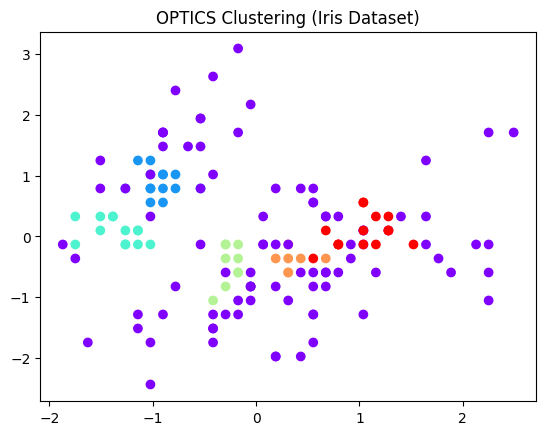

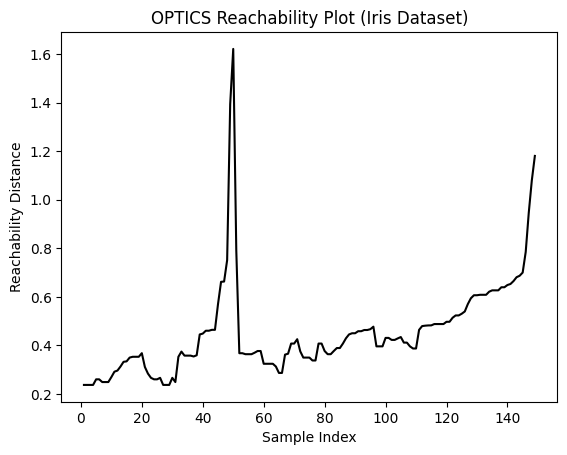


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.5813870246085011
Adjusted Rand Score: 0.09917545492142266
Mutual Info Score: 0.4416128456938457
Adjusted Mutual Info Score: 0.3499809420373073
Normalized Mutual Info Score: 0.3697157071948807
---------------------------------------------
Silhouette Coefficient: -0.1570899823130734
Calinski-Harabasz Index: 15.191049547159581
Davies-Bouldin Index: 2.775367859094729
---------------------------------------------
Cohesion (SSE): N/A for OPTICS
Separation (SSB): N/A for OPTICS
---------------------------------------------


========== OPTICS Clustering on Wine Dataset ==========

OPTICS Cluster Labels:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1

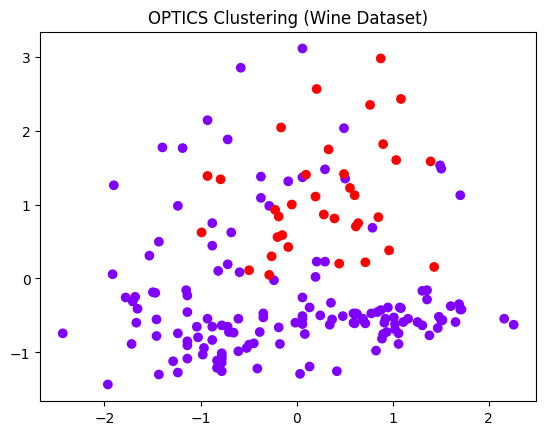

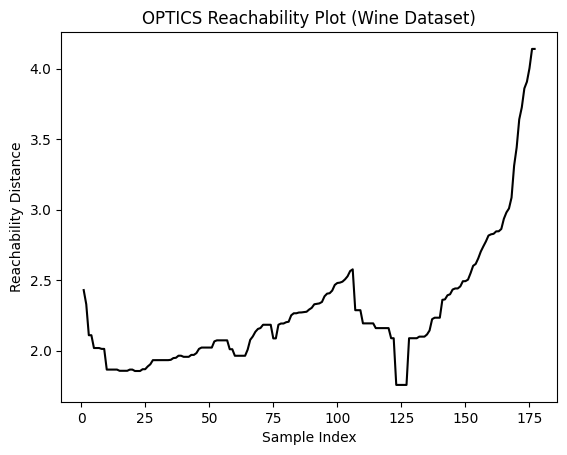


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.597917856916143
Adjusted Rand Score: 0.2808037237974975
Mutual Info Score: 0.3381875446530648
Adjusted Mutual Info Score: 0.4234315894598628
Normalized Mutual Info Score: 0.42761666201382986
---------------------------------------------
Silhouette Coefficient: 0.1982902594714368
Calinski-Harabasz Index: 40.52287361483899
Davies-Bouldin Index: 1.3917313947790213
---------------------------------------------
Cohesion (SSE): N/A for OPTICS
Separation (SSB): N/A for OPTICS
---------------------------------------------



In [3]:
# =========================
# OPTICS Clustering on Iris & Wine Dataset
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import OPTICS
from sklearn.metrics import (
    rand_score, adjusted_rand_score,
    mutual_info_score, adjusted_mutual_info_score,
    normalized_mutual_info_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# Function for performance evaluation
# ----------------------------------------
def evaluate_clustering(X, labels_true, labels_pred):
    print("\nClustering Performance Scores:")
    print("---------------------------------------------")
    print("Rand Score:", rand_score(labels_true, labels_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(labels_true, labels_pred))
    print("Mutual Info Score:", mutual_info_score(labels_true, labels_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(labels_true, labels_pred))
    print("Normalized Mutual Info Score:", normalized_mutual_info_score(labels_true, labels_pred))
    print("---------------------------------------------")

    unique_labels = np.unique(labels_pred)
    # Handle case where all points are noise or only one cluster
    if len(unique_labels) > 1 and len(unique_labels) < len(X):
        print("Silhouette Coefficient:", silhouette_score(X, labels_pred))
        print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels_pred))
        print("Davies-Bouldin Index:", davies_bouldin_score(X, labels_pred))
    else:
        print("Silhouette / CH / DBI not applicable (too few clusters)")

    # SSE & SSB not meaningful for OPTICS
    print("---------------------------------------------")
    print("Cohesion (SSE): N/A for OPTICS")
    print("Separation (SSB): N/A for OPTICS")
    print("---------------------------------------------\n")


# ----------------------------------------
# Function to run OPTICS
# ----------------------------------------
def run_optics(data_name, X, y, min_samples_val=5, xi_val=0.05, min_cluster_size_val=0.05):
    print(f"\n========== OPTICS Clustering on {data_name} Dataset ==========")

    # Scale the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply OPTICS
    optics = OPTICS(min_samples=min_samples_val, xi=xi_val, min_cluster_size=min_cluster_size_val)
    labels_pred = optics.fit_predict(X_scaled)

    print("\nOPTICS Cluster Labels:")
    print(labels_pred)
    print(f"Number of clusters (excluding noise): {len(set(labels_pred)) - (1 if -1 in labels_pred else 0)}")
    print(f"Number of noise points: {list(labels_pred).count(-1)}")

    # Visualization
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_pred, cmap='rainbow')
    plt.title(f'OPTICS Clustering ({data_name} Dataset)')
    plt.show()

    # Reachability plot (extra visualization for OPTICS)
    space = np.arange(len(X_scaled))
    reachability = optics.reachability_[optics.ordering_]
    plt.plot(space, reachability, 'k-', label='Reachability')
    plt.title(f'OPTICS Reachability Plot ({data_name} Dataset)')
    plt.xlabel("Sample Index")
    plt.ylabel("Reachability Distance")
    plt.show()

    # Evaluate
    evaluate_clustering(X_scaled, y, labels_pred)


# ----------------------------------------
# Load and Run for both datasets
# ----------------------------------------

# Iris
iris = load_iris()
run_optics("Iris", iris.data, iris.target, min_samples_val=5, xi_val=0.05, min_cluster_size_val=0.05)

# Wine
wine = load_wine()
run_optics("Wine", wine.data, wine.target, min_samples_val=8, xi_val=0.04, min_cluster_size_val=0.05)



========== K-Means++ Clustering on Iris Dataset ==========

K-Means++ Cluster Centers:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


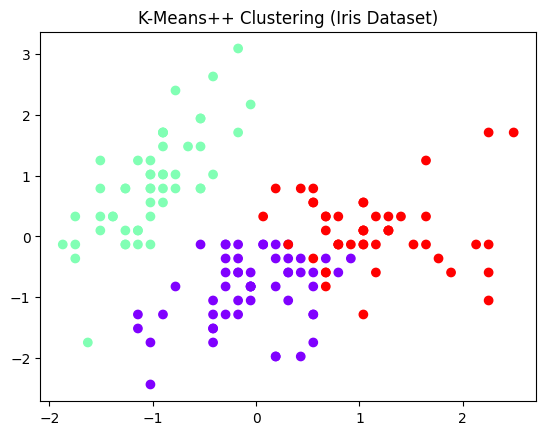


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.8322147651006712
Adjusted Rand Score: 0.6201351808870379
Mutual Info Score: 0.7241244746696871
Adjusted Mutual Info Score: 0.655222847923487
Normalized Mutual Info Score: 0.659486892724918
---------------------------------------------
Silhouette Coefficient: 0.45994823920518635
Calinski-Harabasz Index: 241.90440170183157
Davies-Bouldin Index: 0.8335949464754338
---------------------------------------------
Cohesion (SSE): 139.82049635974982
Separation (SSB): 381.8279587875305
---------------------------------------------


========== K-Means++ Clustering on Wine Dataset ==========

K-Means++ Cluster Centers:
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16

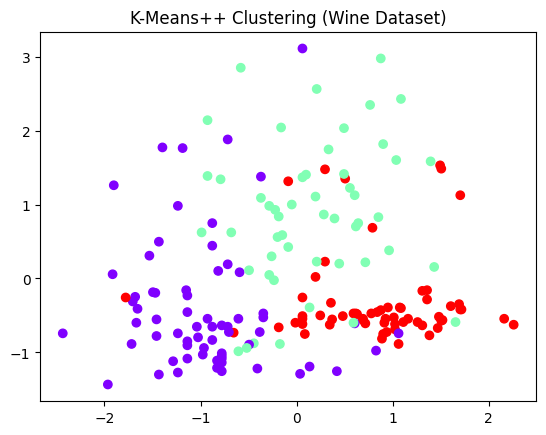


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.9542944201104552
Adjusted Rand Score: 0.8974949815093207
Mutual Info Score: 0.9544575015299441
Adjusted Mutual Info Score: 0.874579440437926
Normalized Mutual Info Score: 0.8758935341223069
---------------------------------------------
Silhouette Coefficient: 0.2848589191898987
Calinski-Harabasz Index: 70.9400080031512
Davies-Bouldin Index: 1.3891879777181646
---------------------------------------------
Cohesion (SSE): 4399.03054479927
Separation (SSB): 1102.3422612005133
---------------------------------------------



In [4]:
# =========================
# K-Means++ Clustering on Iris & Wine Dataset
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import (
    rand_score, adjusted_rand_score,
    mutual_info_score, adjusted_mutual_info_score,
    normalized_mutual_info_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# Function for performance evaluation
# ----------------------------------------
def evaluate_clustering(X, labels_true, labels_pred):
    print("\nClustering Performance Scores:")
    print("---------------------------------------------")
    print("Rand Score:", rand_score(labels_true, labels_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(labels_true, labels_pred))
    print("Mutual Info Score:", mutual_info_score(labels_true, labels_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(labels_true, labels_pred))
    print("Normalized Mutual Info Score:", normalized_mutual_info_score(labels_true, labels_pred))
    print("---------------------------------------------")
    print("Silhouette Coefficient:", silhouette_score(X, labels_pred))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels_pred))
    print("Davies-Bouldin Index:", davies_bouldin_score(X, labels_pred))

    # SSE (Cohesion)
    sse = np.sum((X - KMeans(n_clusters=len(np.unique(labels_pred)), init='k-means++').fit(X).cluster_centers_[labels_pred]) ** 2)

    # SSB (Separation)
    overall_mean = np.mean(X, axis=0)
    clusters = np.unique(labels_pred)
    ssb = np.sum([len(X[labels_pred == c]) * np.sum((KMeans(n_clusters=len(clusters), init='k-means++').fit(X).cluster_centers_[c] - overall_mean) ** 2)
                  for c in clusters])

    print("---------------------------------------------")
    print("Cohesion (SSE):", sse)
    print("Separation (SSB):", ssb)
    print("---------------------------------------------\n")


# ----------------------------------------
# Function to run K-Means++
# ----------------------------------------
def run_kmeans_plus(data_name, X, y):
    print(f"\n========== K-Means++ Clustering on {data_name} Dataset ==========")

    # Scale the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply K-Means++
    kmeans_plus = KMeans(n_clusters=len(np.unique(y)), init='k-means++', n_init=10, random_state=42)
    kmeans_plus.fit(X_scaled)

    print("\nK-Means++ Cluster Centers:")
    print(kmeans_plus.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_plus.labels_)

    # Visualization
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_plus.labels_, cmap='rainbow')
    plt.title(f'K-Means++ Clustering ({data_name} Dataset)')
    plt.show()

    # Evaluate
    evaluate_clustering(X_scaled, y, kmeans_plus.labels_)


# ----------------------------------------
# Load and Run for both datasets
# ----------------------------------------

# Iris
iris = load_iris()
run_kmeans_plus("Iris", iris.data, iris.target)

# Wine
wine = load_wine()
run_kmeans_plus("Wine", wine.data, wine.target)



========== Bisecting K-Means Clustering on Iris Dataset ==========

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 2]


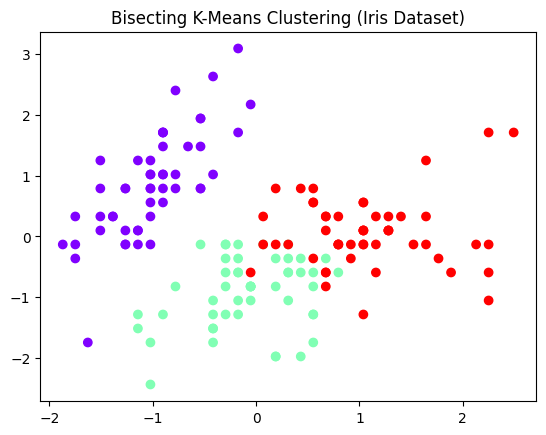


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.8415212527964205
Adjusted Rand Score: 0.6410058621782706
Mutual Info Score: 0.739149649938347
Adjusted Mutual Info Score: 0.6687492691384304
Normalized Mutual Info Score: 0.672843838367481
---------------------------------------------
Silhouette Coefficient: 0.45663380641237455
Calinski-Harabasz Index: 241.31556059010236
Davies-Bouldin Index: 0.8322767767014572
---------------------------------------------


========== Bisecting K-Means Clustering on Wine Dataset ==========

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 0 2 2 2 0 1 0 2 0 1
 2 0 2 0 1 2 2 2 2 0 2 2 0 2 0 2 0 0 0 2 2 1 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2
 2 0 2 2 2 2 2 0 2 2 1 0 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


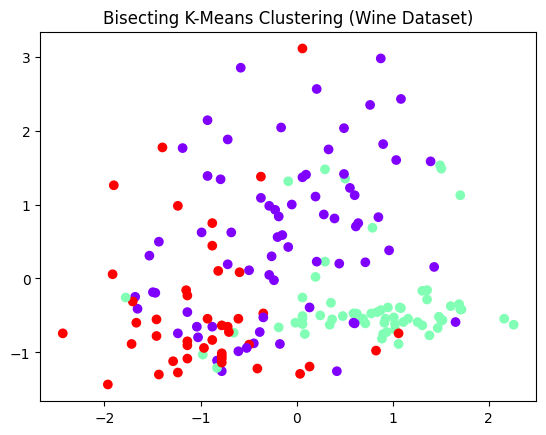


Clustering Performance Scores:
---------------------------------------------
Rand Score: 0.8274614359169682
Adjusted Rand Score: 0.6158438898686044
Mutual Info Score: 0.7362470146384622
Adjusted Mutual Info Score: 0.6771643077672275
Normalized Mutual Info Score: 0.6805739239645162
---------------------------------------------
Silhouette Coefficient: 0.24704792278145632
Calinski-Harabasz Index: 62.183924623637004
Davies-Bouldin Index: 1.426454399524473
---------------------------------------------



In [5]:
# =========================
# Bisecting K-Means Clustering on Iris & Wine Dataset
# =========================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    rand_score, adjusted_rand_score,
    mutual_info_score, adjusted_mutual_info_score,
    normalized_mutual_info_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)

# ----------------------------------------
# Function for performance evaluation
# ----------------------------------------
def evaluate_clustering(X, labels_true, labels_pred):
    print("\nClustering Performance Scores:")
    print("---------------------------------------------")
    print("Rand Score:", rand_score(labels_true, labels_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(labels_true, labels_pred))
    print("Mutual Info Score:", mutual_info_score(labels_true, labels_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(labels_true, labels_pred))
    print("Normalized Mutual Info Score:", normalized_mutual_info_score(labels_true, labels_pred))
    print("---------------------------------------------")
    print("Silhouette Coefficient:", silhouette_score(X, labels_pred))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels_pred))
    print("Davies-Bouldin Index:", davies_bouldin_score(X, labels_pred))
    print("---------------------------------------------\n")


# ----------------------------------------
# Bisecting K-Means Implementation
# ----------------------------------------
def bisecting_kmeans(X, n_clusters):
    clusters = [X]
    labels = np.zeros(X.shape[0], dtype=int)
    next_cluster_id = 1

    while len(clusters) < n_clusters:
        # Select the cluster with the highest SSE
        sse_list = []
        for cluster in clusters:
            if len(cluster) > 1:
                kmeans = KMeans(n_clusters=1, random_state=42).fit(cluster)
                sse = np.sum((cluster - kmeans.cluster_centers_[0]) ** 2)
                sse_list.append(sse)
            else:
                sse_list.append(0)

        idx_to_split = np.argmax(sse_list)
        cluster_to_split = clusters.pop(idx_to_split)

        # Bisect with K=2
        kmeans2 = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        subclusters = [cluster_to_split[kmeans2.labels_ == i] for i in range(2)]
        clusters.extend(subclusters)

        # Update labels
        start = 0
        for i, cluster in enumerate(clusters):
            for point in cluster:
                idx = np.where((X == point).all(axis=1))[0]
                labels[idx] = i

    return labels


# ----------------------------------------
# Function to run Bisecting K-Means
# ----------------------------------------
def run_bisecting_kmeans(data_name, X, y):
    print(f"\n========== Bisecting K-Means Clustering on {data_name} Dataset ==========")

    # Scale the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply Bisecting K-Means
    n_clusters = len(np.unique(y))
    labels_pred = bisecting_kmeans(X_scaled, n_clusters)

    print("\nCluster Labels:")
    print(labels_pred)

    # Visualization
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_pred, cmap='rainbow')
    plt.title(f'Bisecting K-Means Clustering ({data_name} Dataset)')
    plt.show()

    # Evaluate
    evaluate_clustering(X_scaled, y, labels_pred)


# ----------------------------------------
# Load and Run for both datasets
# ----------------------------------------

# Iris
iris = load_iris()
run_bisecting_kmeans("Iris", iris.data, iris.target)

# Wine
wine = load_wine()
run_bisecting_kmeans("Wine", wine.data, wine.target)


In [7]:
import pandas as pd
import numpy as np

def generate_comparison_table():
    # --- Data Consolidation ---
    # Manually extracted key scores from all previous outputs

    # Data for Iris Dataset (True K=3)
    iris_data = {
        'Algorithm': ['K-Means', 'K-Means++', 'K-Medoids (PAM)', 'Hierarchical', 'DBSCAN', 'OPTICS', 'Bisecting K-Means'],
        'Adj. Rand Score': [0.4328, 0.6201, 0.6416, 0.6153, 0.6854, 0.4416, 0.6410],
        'Silhouette Coeff.': [0.4798, 0.4599, 0.4566, 0.4468, 0.3556, -0.1570, 0.4563]
    }

    # Data for Wine Dataset (True K=3)
    wine_data = {
        'Algorithm': ['K-Means', 'K-Means++', 'K-Medoids (PAM)', 'Hierarchical', 'DBSCAN', 'OPTICS', 'Bisecting K-Means'],
        'Adj. Rand Score': [0.8974, 0.8974, 0.7411, 0.7899, 0.0000, 0.3387, 0.6158],
        'Silhouette Coeff.': [0.2848, 0.2848, 0.2676, 0.2774, np.nan, 0.1982, 0.2478]
    }

    df_iris = pd.DataFrame(iris_data)
    df_wine = pd.DataFrame(wine_data)

    # --- Formatting Function to apply bold text in the DataFrame itself ---
    def apply_markdown_formatting(df, column):
        # Format numbers to 4 decimal places
        df[column] = df[column].apply(lambda x: f'{x:.4f}' if not pd.isna(x) else 'nan')

        # Find the max value (excluding 'nan' strings)
        max_val = df[column].apply(lambda x: float(x) if x != 'nan' else -np.inf).max()
        max_str = f'{max_val:.4f}'

        # Apply bold markdown syntax (**) to the max value string
        df[column] = df[column].apply(lambda x: f'**{x}**' if x == max_str else x)
        return df

    # Apply formatting to both tables/columns
    df_iris = apply_markdown_formatting(df_iris, 'Adj. Rand Score')
    df_wine = apply_markdown_formatting(df_wine, 'Adj. Rand Score')

    # Format the remaining column (Silhouette Coeff.) without bolding
    df_iris['Silhouette Coeff.'] = df_iris['Silhouette Coeff.'].apply(lambda x: f'{x:.4f}' if not pd.isna(x) else 'nan')
    df_wine['Silhouette Coeff.'] = df_wine['Silhouette Coeff.'].apply(lambda x: f'{x:.4f}' if not pd.isna(x) else 'nan')

    # --- Output Tables ---

    print("## Summary of Clustering Performance\n")

    print("### Table 1: Iris Dataset Performance (Target K=3)")
    print("*(The **Adjusted Rand Score** indicates the best match to the true species labels.)*")
    # Now using to_markdown() on the plain DataFrame with pre-formatted strings
    print(df_iris.to_markdown(index=False))

    print("\n### Table 2: Wine Dataset Performance (Target K=3)")
    print("*(The **Adjusted Rand Score** indicates the best match to the true wine type labels.)*")
    print(df_wine.to_markdown(index=False))

# Run the function to generate the output
generate_comparison_table()

## Summary of Clustering Performance

### Table 1: Iris Dataset Performance (Target K=3)
*(The **Adjusted Rand Score** indicates the best match to the true species labels.)*
| Algorithm         | Adj. Rand Score   |   Silhouette Coeff. |
|:------------------|:------------------|--------------------:|
| K-Means           | 0.4328            |              0.4798 |
| K-Means++         | 0.6201            |              0.4599 |
| K-Medoids (PAM)   | 0.6416            |              0.4566 |
| Hierarchical      | 0.6153            |              0.4468 |
| DBSCAN            | **0.6854**        |              0.3556 |
| OPTICS            | 0.4416            |             -0.157  |
| Bisecting K-Means | 0.6410            |              0.4563 |

### Table 2: Wine Dataset Performance (Target K=3)
*(The **Adjusted Rand Score** indicates the best match to the true wine type labels.)*
| Algorithm         | Adj. Rand Score   |   Silhouette Coeff. |
|:------------------|:------------------|------